In [23]:
import pandas as pd
import math
import numpy as np
from matplotlib import pyplot as plt
import scipy as sp

In [24]:
movie_data = pd.read_csv('christmas_movies.csv')

# Predicting imdb rating from gross earnings
X = movie_data['gross'].to_numpy() # gross in millions of dollars
X_adjusted = []
y = movie_data['imdb_rating']
y_adjusted = []

# X.size == y.size

for i in range(0, X.size):
    x_val = X[i]
    y_val = y[i]
    
    if type(x_val) == str and type(y_val) == np.float64:
        string = x_val[1:-1]
        data = float(string)
        X_adjusted.append(data)
        y_adjusted.append(y_val)

    

print(f'x = {X_adjusted}')
print(f'y = {y_adjusted}')
print(f'n = {len(X_adjusted)}')

x = [59.7, 71.32, 285.76, 260.04, 173.4, 30.0, 83.01, 270.62, 173.59, 183.37, 144.83, 60.33, 17.19, 35.15, 137.86, 139.24, 2.65, 27.28, 120.15, 73.78, 72.11, 60.06, 60.57, 54.77, 75.08, 30.88, 35.09, 84.5, 56.36, 23.72, 46.46, 72.01, 34.55, 4.05, 108.1, 71.32, 30.0, 35.15, 2.65, 27.28, 120.15, 54.77, 46.46, 7.57, 3.7, 140.37, 8.18, 409.01, 32.62, 54.86, 11.66, 16.3, 18.59, 0.2, 17.78, 5.68, 103.41, 50.08, 12.21, 50.29, 18.6, 49.12, 11.44, 37.63, 70.53, 0.17, 35.03, 14.81, 132.09, 2.12, 13.68, 41.72, 7.47, 0.01, 21.0, 10.22, 67.36, 21.3, 29.08, 0.11, 0.13, 82.99, 6.3, 2.78, 0.08, 5.45, 4.34, 16.6]
y = [7.6, 7.5, 7.7, 6.3, 7.1, 7.5, 8.2, 6.3, 6.8, 6.6, 6.5, 6.9, 6.6, 6.5, 6.8, 5.7, 7.9, 7.7, 5.7, 5.4, 5.6, 7.1, 5.7, 5.9, 7.9, 4.5, 5.0, 4.8, 7.9, 6.2, 7.1, 5.6, 5.4, 7.1, 7.8, 7.5, 7.5, 6.5, 7.9, 7.7, 5.7, 5.9, 7.1, 7.5, 7.5, 7.0, 7.3, 7.1, 6.2, 5.6, 5.4, 7.0, 6.4, 8.0, 5.6, 7.0, 7.2, 7.3, 5.5, 6.8, 8.3, 6.3, 6.9, 6.8, 6.6, 7.6, 6.2, 5.9, 7.7, 5.8, 6.4, 6.1, 7.2, 5.7, 8.0, 6.1, 7.3, 7.2, 6

In [53]:
def my_model(x, a, b, c):
    return a * np.sqrt(abs(b * x)) + c

p_opt, p_cov = sp.optimize.curve_fit(my_model, X_adjusted, y_adjusted, p0=[2.78, 1.3, 0]) # min value
# p_opt is optimal parameters for my_model, p_cov is covariance matrix, estimates error for goodness of fit
print(f'p_opt: {p_opt} \n p_cov: {p_cov}')


# to fit this data, minimize the sum of the residuals squared ∑i(f(xi, β) - yi)², called least squares

p_opt: [ 4.57805382e-01 -3.49968006e-04  6.59541654e+00] 
 p_cov: [[6.31114039e+11 9.64906710e+08 9.91916872e+03]
 [9.64906710e+08 1.47524045e+06 1.51657781e+01]
 [9.91916872e+03 1.51657781e+01 4.65078081e-02]]


In [54]:
a_opt, b_opt, c_opt = p_opt
x_model = np.linspace(min(X_adjusted), max(X_adjusted), len(X_adjusted))
y_model = my_model(x_model, a_opt, b_opt, c_opt)

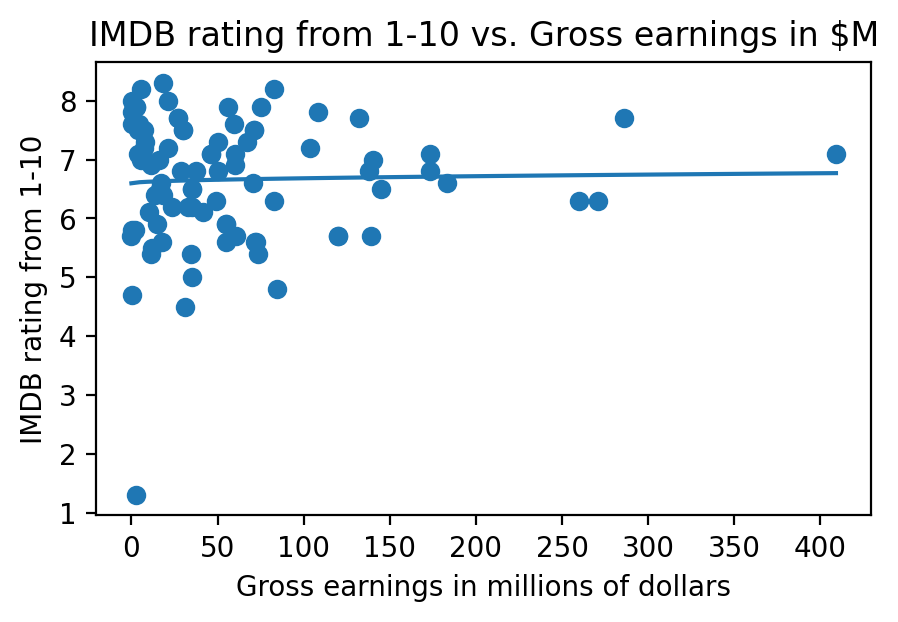

In [57]:
plt.figure(figsize=(5, 3), dpi=200)
plt.scatter(X_adjusted, y_adjusted)
plt.xlabel('Gross earnings in millions of dollars')
plt.ylabel('IMDB rating from 1-10')
plt.title('IMDB rating from 1-10 vs. Gross earnings in $M')

plt.plot(x_model, y_model, markersize=5)

# the tail in the beginning is due to the

plt.show()

In [ ]:
# the predictions start here

In [ ]:
# Data Analysis

print('The data ')